# GetAround

## Analyses


In [21]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
URL_DELAY = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx"
URL_PRICING = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv"

In [5]:

df = pd.read_excel(URL_DELAY, sheet_name='rentals_data', engine="openpyxl")

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [6]:
df.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


On retire les locations annulées

In [7]:
df = df.loc[df["state"] == "ended", :]

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0


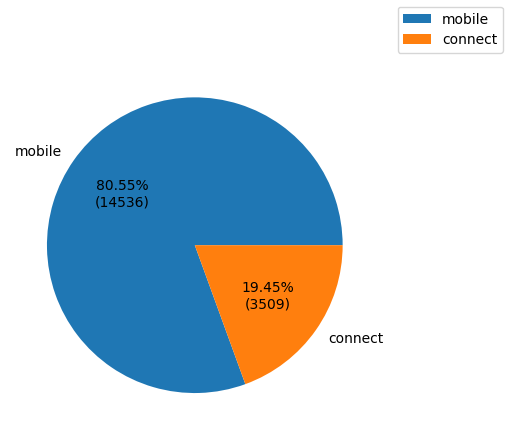

In [25]:
type_value_counts = df.checkin_type.value_counts()
plt.pie(type_value_counts, labels=type_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(type_value_counts)/100 :.0f})')
plt.figlegend(type_value_counts.index)
plt.show()

In [26]:
def get_delay_state(minutes):
    if (minutes < 0):
        return "early"
    elif (minutes > 0 ):
        return "late"
    else:
        return "on time"

df["delay_state"] = df["delay_at_checkout_in_minutes"].apply(get_delay_state)

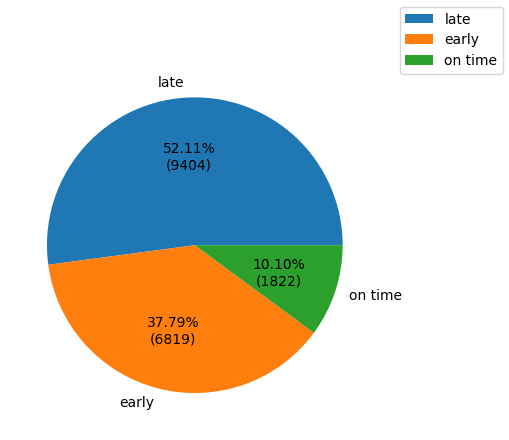

In [27]:
delay_state_value_counts = df.delay_state.value_counts()
plt.pie(delay_state_value_counts, labels=delay_state_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(delay_state_value_counts)/100 :.0f})')
plt.figlegend(delay_state_value_counts.index)
plt.show()

In [43]:
px.histogram(
    df.loc[(df["delay_at_checkout_in_minutes"] > 0) & (df["delay_at_checkout_in_minutes"] <= 200), ], 
    x="delay_at_checkout_in_minutes", 
    nbins=40,
    color="checkin_type"
)